## week04: understanding the positional encoding

_This notebook is brought to you by [Vladislav Goncharenko](https://www.linkedin.com/in/vladislav-goncharenko/)_

In [1]:
# If using Colab, uncomment this cell
! pip install plotly --upgrade

     |████████████████████████████████| 13.1MB 237kB/s 
  Found existing installation: plotly 4.4.1
    Uninstalling plotly-4.4.1:
      Successfully uninstalled plotly-4.4.1


In [2]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

import plotly.express as px

In [3]:
plt.rcParams.update({'font.size': 14})

Positional Encoding matrix components proposed in the article

$$
PE_{(pos,2i)} = 
\sin \left( \frac{pos}{10000^{2i/d_{\text{model}}}} \right) \sim
$$

$$
\sim \sin \left( \exp \left( -\frac{2i}{d_{\text{model}}} \right) \cdot \text{pos} \right) =
\sin(\omega \cdot t)
$$

$$ \\ $$

$$
PE_{(pos,2i+1)} =
\cos(\dots) \sim \cos (\omega \cdot t)
$$

Let's treat $\text{pos}$ as time and number of embedding component as carrier frequency of our signal.

Note that carrier frequencies decrease exponentionally.

In [4]:
def make_carriers(d_mod, denom):
    return 1 / np.power(denom, np.arange(d_mod) / d_mod)

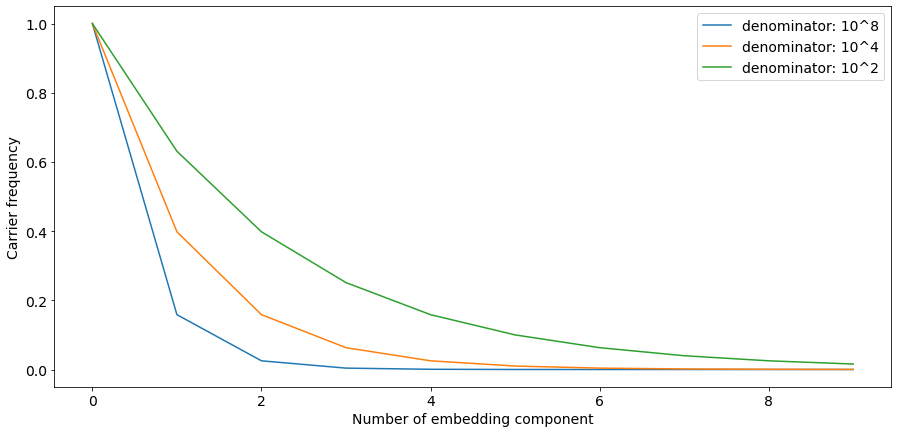

In [5]:
carriers = {i: make_carriers(10, 10**i) for i in (8, 4, 2)}

plt.figure(figsize=(15, 7))
for i, carrier in carriers.items():
    plt.plot(carrier, label=f'denominator: 10^{i}')
plt.legend()
plt.xlabel('Number of embedding component')
plt.ylabel('Carrier frequency')
plt.show()

In fact different frequencies correspond to different "clocks" that we have to measure $\text{pos}$ as time.

Model doesn't know $\text{pos}$ value directly but it sees all the "times" (in fact phases) of differend "clocks" ($\sin$s and $\cos$s of different frequencies)

Having representative sutie of "clocks" we can definetly say _what time is it now ($\text{pos}$ value)_ for every given "moment"

In [6]:
def make_pa_matrix(n_pos, d_mod, denom):
    res= np.empty((n_pos, d_mod))
    carriers = make_carriers(d_mod, denom)

    for pos in range(n_pos):
        if pos % 2:
            funct = np.sin
        else:
            funct = np.cos

        for i in range(d_mod):
            res[pos, i] = funct((pos // 2) * carriers[i])
    return res

# 2d case

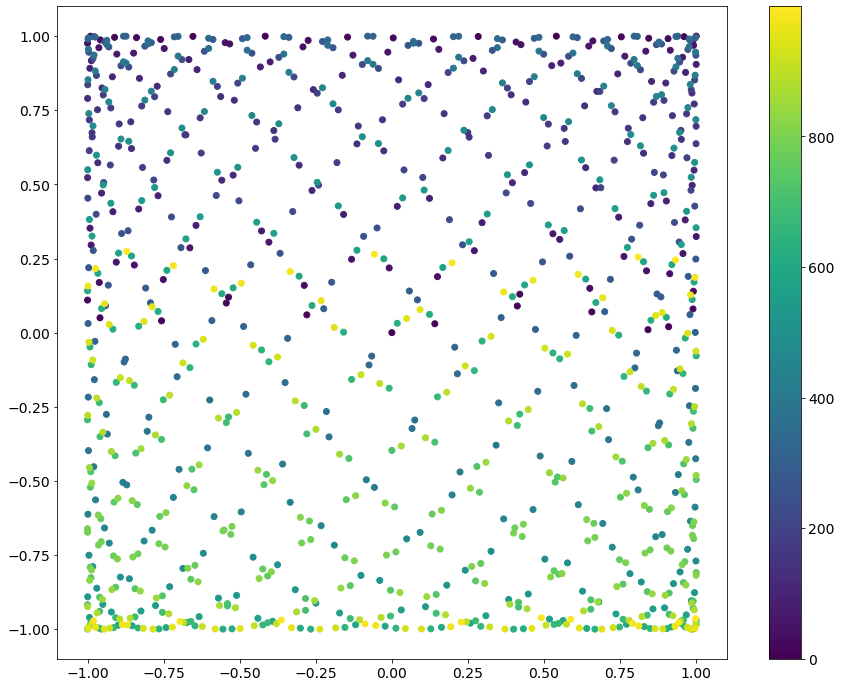

In [7]:
pa2 = make_pa_matrix(1000, 2, 10**4)

plt.figure(figsize=(15, 12))
plt.scatter(pa2[:, 0], pa2[:, 1], c=np.arange(len(pa2)))
plt.colorbar()
plt.show()

**Nice and harmonic picture, isn't it?**

That's because the curve plotted is [Lissajou's curve](https://en.wikipedia.org/wiki/Lissajous_curve):

![](https://upload.wikimedia.org/wikipedia/commons/5/5d/Lissajous_animation.gif)

Curve implicitly specified by harmonic coordinates

$$\left\{ \begin{align}
  & x(t)=A\sin (at+\delta ) \\ 
 & y(t)=B\sin (bt) \\ 
\end{align} \right.
$$

In our case $\delta = \pi / 2$

# 3d case

In [8]:
pa3 = make_pa_matrix(250, 3, 2**3)

In [9]:
pa3_df = pd.DataFrame(
    np.concatenate((pa3, np.arange(len(pa3))[:, None]), axis=1),
    columns=['x', 'y', 'z', 'c'],
)
pa3_df.head()

,x,y,z,c
0,1.000000,1.000000,1.000000,0.0
1,0.000000,0.000000,0.000000,1.0
2,0.540302,0.877583,0.968912,2.0
3,0.841471,0.479426,0.247404,3.0
4,-0.416147,0.540302,0.877583,4.0


In [10]:
fig = px.scatter_3d(pa3_df, x='x', y='y', z='z', color='c')
fig.show()